In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.titlesize'] = 24

# Chapter 4: What Is This Stuff Called Probability?

Given an experiment, an event is one of the possible outcomes of the experiment. The set of these events, $\Omega$, is known as the *sample space*. Each event x in $\Omega$ has an associated probability, or likelihood or occurrence. 

Probabilities must satisfy the three properties (Kolmogerov)
1. For $x \in \Omega$, $P(X = x) \geq 0$
2. $\sum_{x \in \Omega} P(X = x) = 1$ 
3. For independent events $x_0$ and $x_1$, $P(X = x_0 \cup X = x_1) = p_{x_0} + p_{x_1}$

In the case of coin toss, the sample space is [heads, tails]. If the coin is fair, we would except the probability of each event in the sample space is 50%.

Imagine sample a coin 500 times. We want to know the probability of each outcome in the sample space but we are not sure the coin is fair. One simple way to tell is to simulate the coin flip a large number times and calculate the fraction of heads. After 2000 coin flips, heads appeared around 50% of the time.

In [5]:
import random
import numpy as np
from collections import Counter

## Coin Proportions

# The sample space is the possible outcomes in a coin flip
sample_space = ['H','T']
# N is the number of events
N = 2000

# We randomly flip the coin N times by randomly sampling from the event space n teams
flips = np.random.choice(a = sample_space, size = N, replace = True)

# We define our
# Use the Counter method to find the proportion of heads for the first n events
heads_proportion = np.array([Counter(flips[0:n-1])['H'] / n for n in range(1,N+1)])

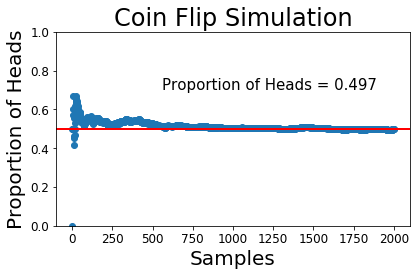

In [6]:
# The X and Y values for scatterplots. 
x = range(1,N+1)
y = heads_proportion

fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_ylim(0, 1)

annot = 'Proportion of Heads = ' + str(heads_proportion[-1])
ax.annotate(annot, xy=(0.3,0.7), xycoords="axes fraction", fontsize = 15)

ax.axhline(y=0.5, linestyle='-')

ax.set_xlabel('Samples')
ax.set_ylabel('Proportion of Heads')
ax.set_title('Coin Flip Simulation')

fig.tight_layout()

## Probability Distributions

With too large of a sample space, it is easier to define the probabilities using a function. For each of these functions, we can calculate an average value, or mean, and the dispersion of the distribution, or variance. 

### Discrete Distributions 

Discrete distributions involve a finite amount of outcomes. Continuous distributions can be binned in order be approximated as a discrete distribution. The probability mass is the probability of each event occuring, and thus must sume to 1. The probability distribution of the above coin example is shown below. 

Mean: $E[X] = \sum_x xp(x)$

Variance: $Var[X] = E\big[(X-\mu)^2\big] = E\big[X^2\big] - E[X]^2$

[Text(0,0,'Heads'), Text(0,0,'Tails')]

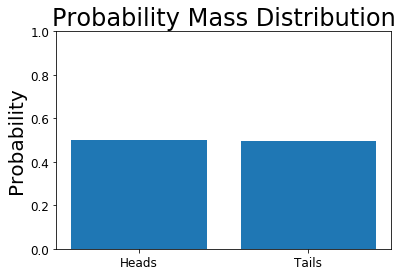

In [52]:
probs = [heads_proportion[-1], 1 - heads_proportion[-1]]
bars = ('Heads', "Tails")
y_pos = np.arange(len(bars))

fig, ax = plt.subplots();
ax.bar(y_pos,probs);

ax.set_ylim(0, 1)

ax.set_ylabel('Probability')
ax.set_title('Probability Mass Distribution')
ax.set_xticks(y_pos)
ax.set_xticklabels(bars)

### Continuous Distributions 

Some experiments have an infinite large sample space. In order to satisfy rule 2 of probabilities, the probability of each event occuring is 0. Thus, it makes more sense to think of *probability density*, or the mass per interval width. 

Given an index of intervals i, 

$\sum_i p([x_i, x_i + \delta x]) = \sum_i \frac{\delta x p([x_i, x_i + \delta x])}{\delta x} = \int p(x) dx = 1$

We can also define the mean and variance as:

Continuous Mean: $E[X] = \int xp(x) dx$

Discrete Variance: $Var[X] = \int p(x)(x - E[X])^2 dx $

Below is the normal probability density function (Guassian) where $\mu$ is the mean and $\sigma$ is the standard deviation.

$p(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp{-\frac{1}{2}\big[\frac{x-\mu}{\sigma}\big]^2}$

Text(0.5,1,'Probability Density Distribution')

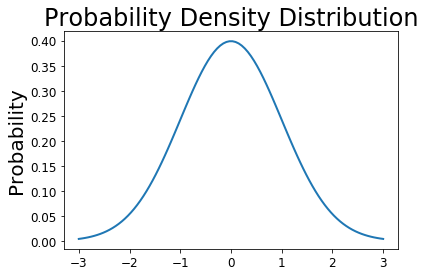

In [57]:
import math
import matplotlib.mlab as mlab

fig, ax = plt.subplots();

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax.plot(x,mlab.normpdf(x, mu, sigma))

ax.set_ylabel('Probability')
ax.set_title('Probability Density Distribution')

## Highest Density Interval (HDI)

The HDI is an interval that spans Q percent of a distribution such that the values inside the interval are more credible than points outside of the interval. More formally, \given a fraction Q, the Q percent HDI include all values of x such that its density is greater than W ($p(x) > W$) where W satisfies $\int_{x:p(x) > W} p(x) dx = Q$.

## Marginal Probabilities

Given a multivariate distribution, the marginal probability of variable x is the probability of variable x without regards of the other variables in the distribution.

$p(X = x) = \sum_y p(x,y)$

## Conditional Probability

Given a multivariate distribution, the conditional probability is the probability of one variable given the probability of another variable. 

$p(X=x|Y=y) = \frac{p(X=x,Y=y)}{\sum_{x*} p(X=x,Y=y)} $

If two variables X,Y are completely independent, then the conditional probability is $p(X=x|Y = y) = p(X=x)$